In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
PRED_PATH = "output/predictions.pt"
TARGET_PATH = "output/targets.pt"
SAVE_DIR = "output"
os.makedirs(SAVE_DIR, exist_ok=True)
THRESHOLD_PERCENTILE = 98
PLOT_OUTPUT = os.path.join(SAVE_DIR, "anomaly_plot.png")
CSV_OUTPUT = os.path.join(SAVE_DIR, "anomaly_score.csv")

In [3]:
preds = torch.load(PRED_PATH).numpy()
targets = torch.load(TARGET_PATH).numpy()

In [4]:
preds.shape

(1856, 13)

In [5]:
targets.shape

(1856, 13)

In [6]:
scores = np.mean((preds - targets) ** 2, axis=1)


In [7]:
threshold = np.percentile(scores, THRESHOLD_PERCENTILE)
is_anomaly = (scores > threshold).astype(int)

In [8]:
threshold = np.percentile(scores, THRESHOLD_PERCENTILE)
is_anomaly = (scores > threshold).astype(int)

In [9]:
df = pd.DataFrame({
    "anomaly_score": scores,
    "is_anomaly": is_anomaly
})
df.to_csv(CSV_OUTPUT, index=False)

In [10]:
df.shape

(1856, 2)

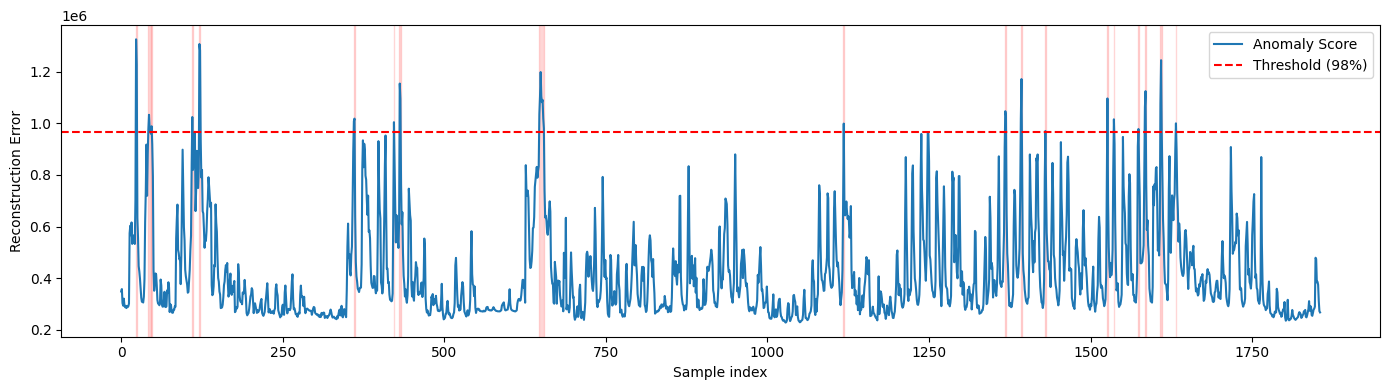

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(scores, label="Anomaly Score")
start = None
for i in range(len(df)):
    if df["is_anomaly"][i]:
        if start is None:
            start = i
    else:
        if start is not None:
            plt.axvspan(start - 0.5, i - 0.5, color="#FF9999", alpha=0.4)
            start = None
if start is not None:
    plt.axvspan(start - 0.5, len(df) - 0.5, color="#FF9999", alpha=0.4)

plt.axhline(y=threshold, color="red", linestyle="--", label=f"Threshold ({THRESHOLD_PERCENTILE}%)")
plt.xlabel("Sample index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.tight_layout()
plt.savefig(PLOT_OUTPUT)
plt.show()

In [12]:
df_raw = pd.read_csv("data/AirQualityUCI.csv")



In [13]:
df_raw

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005 10.00.00,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005 11.00.00,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005 12.00.00,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005 13.00.00,2.1,1003.0,275.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [14]:
df_raw = df_raw.iloc[:1856].copy()

In [15]:
df_raw["anomaly_score"] = scores
df_raw["is_anomaly"] = is_anomaly


In [16]:
df_raw.to_csv("output/air_quality_with_anomaly.csv", index=False)


PermissionError: [Errno 13] Permission denied: 'output/air_quality_with_anomaly.csv'

In [20]:
%load_ext tensorboard
%tensorboard --logdir ./output --port 6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
